In [3]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the base directory as the current working directory
BASE_DIR = os.getcwd()  # This gets the current working directory
train_file = os.path.join(BASE_DIR, 'train.csv')
test_file = os.path.join(BASE_DIR, 'test.csv')
sample_submission_file = os.path.join(BASE_DIR, 'sample_submission.csv')

# Load train and test data
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Step 1: Data Exploration
print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())

# Step 2: Data Preprocessing

# Separate the target from the train dataset
X = train_data.drop(columns=['loan_status'])  # Features
y = train_data['loan_status']  # Target

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Define preprocessing for numeric data (imputation and scaling)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Scale numeric features
])

# Define preprocessing for categorical data (imputation and one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing for both numeric and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Step 3: Build pipeline with preprocessing and Random Forest model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Step 4: Model Training

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Validate the model
y_val_pred = model_pipeline.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_val_pred)
print(f"Validation AUC Score: {auc_score}")

# Step 5: Predict on Test Data

# Predict the probabilities for test data
test_preds = model_pipeline.predict_proba(test_data)[:, 1]

# Step 6: Prepare the Submission File

# Load sample submission to get the 'id' column
sample_submission = pd.read_csv(sample_submission_file)

# Prepare the final submission dataframe
submission = pd.DataFrame({
    'id': sample_submission['id'],
    'loan_status': test_preds
})

# Save to CSV
submission.to_csv(os.path.join(BASE_DIR, 'submission_final.csv'), index=False)
print("Submission file created successfully.")


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3),

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3),

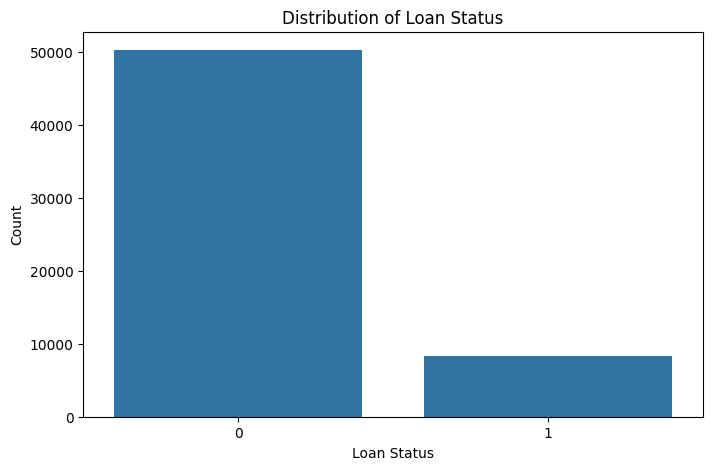

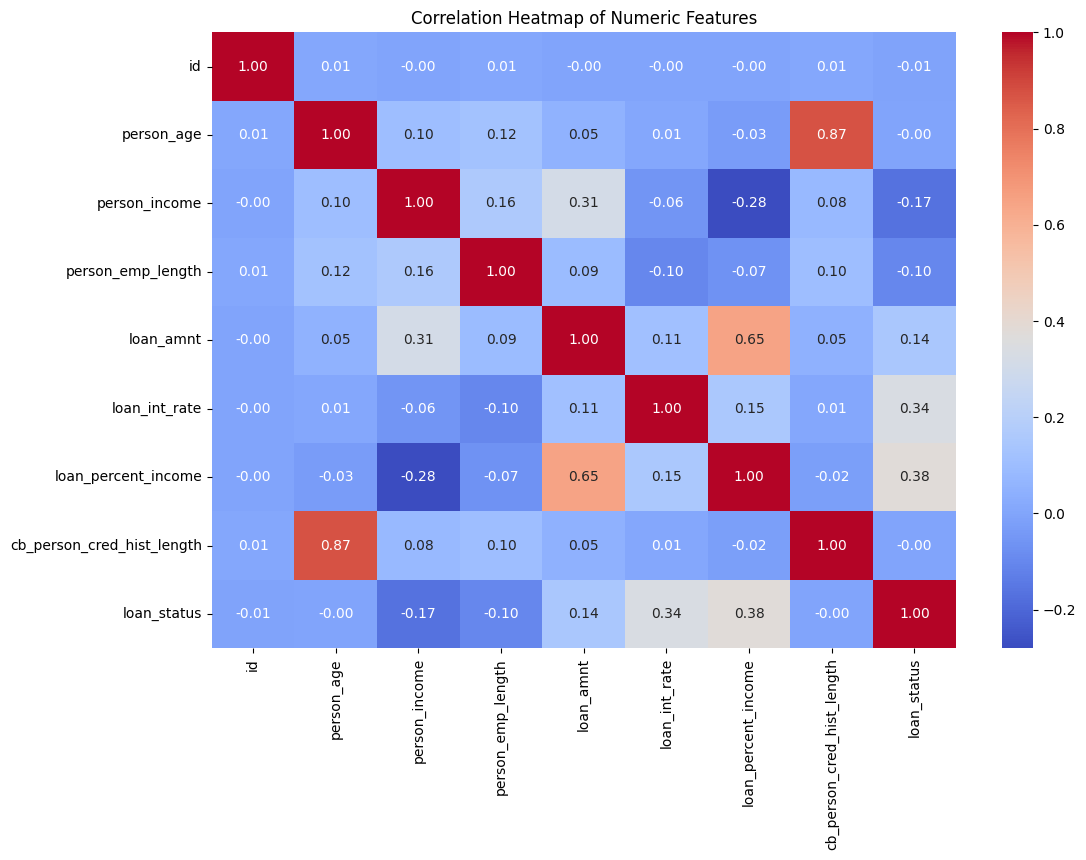

Validation AUC Score: 0.9370251648659101
Submission file created successfully.


In [8]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the base directory as the current working directory
BASE_DIR = os.getcwd()  # This gets the current working directory
train_file = os.path.join(BASE_DIR, 'train.csv')
test_file = os.path.join(BASE_DIR, 'test.csv')
sample_submission_file = os.path.join(BASE_DIR, 'sample_submission.csv')

# Load train and test data
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Step 1: Data Exploration
print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())

# EDA: Graph 1 - Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', data=train_data)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# EDA: Graph 2 - Correlation Heatmap
# Extract numeric columns only for the heatmap
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(train_data[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()



# Step 2: Data Preprocessing

# Separate the target from the train dataset
X = train_data.drop(columns=['loan_status'])  # Features
y = train_data['loan_status']  # Target

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Define preprocessing for numeric data (imputation and scaling)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Scale numeric features
])

# Define preprocessing for categorical data (imputation and one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing for both numeric and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Step 3: Build pipeline with preprocessing and Random Forest model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Step 4: Model Training

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Validate the model
y_val_pred = model_pipeline.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_val_pred)
print(f"Validation AUC Score: {auc_score}")

# Step 5: Predict on Test Data

# Predict the probabilities for test data
test_preds = model_pipeline.predict_proba(test_data)[:, 1]

# Step 6: Prepare the Submission File

# Load sample submission to get the 'id' column
sample_submission = pd.read_csv(sample_submission_file)

# Prepare the final submission dataframe
submission = pd.DataFrame({
    'id': sample_submission['id'],
    'loan_status': test_preds
})

# Save to CSV
submission.to_csv(os.path.join(BASE_DIR, 'submission_final.csv'), index=False)
print("Submission file created successfully.")
